In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
Lx = Ly = 1.0
alpha = 30 
 
def u_f_exact(x, y):
    return np.exp(-alpha * ((x - 0.5)**2 + (y - 0.5)**2))

In [11]:
 def functie(x, y):
    u = u_f_exact(x, y)
    du_dx = -2 * alpha * (x - 0.5) * u
    du_dy = -2 * alpha * (y - 0.5) * u
    d2u_dx2 = (4 * alpha**2 * (x - 0.5)**2 - 2 * alpha) * u
    d2u_dy2 = (4 * alpha**2 * (y - 0.5)**2 - 2 * alpha) * u
 
    kx = 1 + x**2
    ky = 1 + y**2
    dkx_dx = 2 * x
    dky_dy = 2 * y
 
    term_x = dkx_dx * du_dx + kx * d2u_dx2
    term_y = dky_dy * du_dy + ky * d2u_dy2
    return -(term_x + term_y)


In [12]:
def du_dx_exact(x, y):
    u = u_f_exact(x, y)
    return -2 * alpha * (x - 0.5) * u

In [13]:
def ruleaza(n):
    x = np.linspace(0, Lx, n)
    y = np.linspace(0, Ly, n)
    h = x[1] - x[0]
    X, Y = np.meshgrid(x, y, indexing='ij')
 
    kx = 1 + X**2
    ky = 1 + Y**2
    f = functie(X, Y)
    u_exact = u_f_exact(X, Y)
 
    u = np.zeros_like(X)
    du_dx_stanga = du_dx_exact(0, y)
    du_dx_dreapta = du_dx_exact(1, y)
    u[0, 1:-1] = u[1, 1:-1] - h * du_dx_stanga[1:-1]
    u[-1, 1:-1] = u[-2, 1:-1] + h * du_dx_dreapta[1:-1]

    u[:, 0] = u_exact[:, 0]
    u[:, -1] = u_exact[:, -1]
 
    u_nou = u.copy()
 
    for _ in range(2000):
        u_vechi = u_nou.copy()
        for i in range(1, n-1):
            for j in range(1, n-1):
                kx1 = kx[i-1, j]
                kx2 = kx[i+1, j]
                ky1 = ky[i, j-1]
                ky2 = ky[i, j+1]
 
                u_nou[i, j] = (
                    kx1 * u_vechi[i-1, j] + kx2 * u_vechi[i+1, j] +
                    ky1 * u_vechi[i, j-1] + ky2 * u_vechi[i, j+1] +
                    h**2 * f[i, j]
                ) / (kx1 + kx2 + ky1 + ky2)

    du_dx_stanga = du_dx_exact(0, y)
    du_dx_dreapta = du_dx_exact(1, y)
    u_nou[0, 1:-1] = u_nou[1, 1:-1] - h * du_dx_stanga[1:-1]
    u_nou[-1, 1:-1] = u_nou[-2, 1:-1] + h * du_dx_dreapta[1:-1]
    
    u_nou[:, 0] = u_exact[:, 0]
    u_nou[:, -1] = u_exact[:, -1]
 
    eroare = np.linalg.norm(u_nou - u_exact) * h * h
    return u_nou, u_exact, np.abs(u_nou - u_exact), eroare, h, X, Y
 

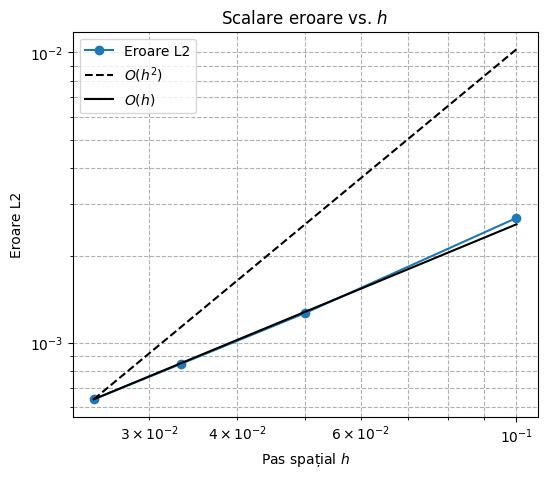

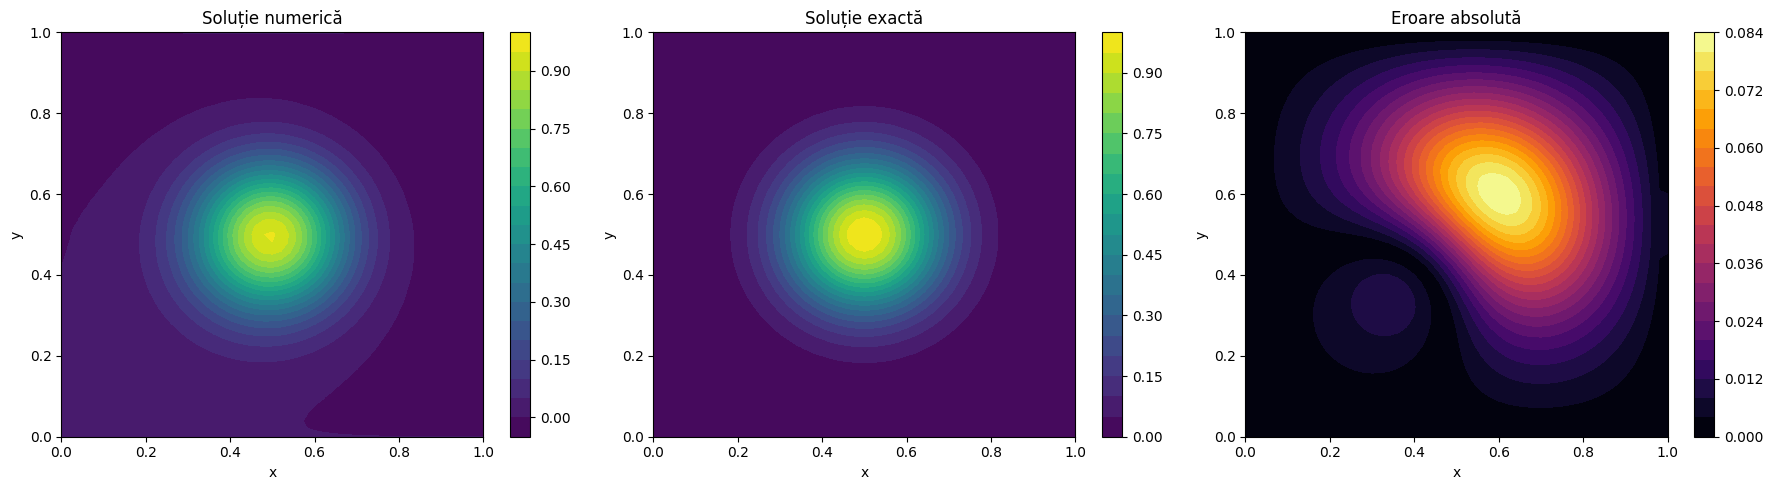

In [14]:

resolutions = [11, 21, 31, 41]
errors = []
hs = []
for n in resolutions:
    _, _, _, err, h, _, _ = ruleaza(n)
    errors.append(err)
    hs.append(h)
 
plt.figure(figsize=(6, 5))
plt.loglog(hs, errors, 'o-', label='Eroare L2')
plt.loglog(hs, [errors[-1]*(h/hs[-1])**2 for h in hs], 'k--', label='$O(h^2)$')
plt.loglog(hs, [errors[-1]*(h/hs[-1]) for h in hs], 'k-', label='$O(h)$')
plt.xlabel('Pas spațial $h$')
plt.ylabel('Eroare L2')
plt.title('Scalare eroare vs. $h$')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()
 
u_num, u_ex, err, _, _, X, Y = ruleaza(51)
 
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
cs1 = axs[0].contourf(X, Y, u_num, 20, cmap='viridis')
axs[0].set_title('Soluție numerică')
fig.colorbar(cs1, ax=axs[0])
 
cs2 = axs[1].contourf(X, Y, u_ex, 20, cmap='viridis')
axs[1].set_title('Soluție exactă')
fig.colorbar(cs2, ax=axs[1])
 
cs3 = axs[2].contourf(X, Y, err, 20, cmap='inferno')
axs[2].set_title('Eroare absolută')
fig.colorbar(cs3, ax=axs[2])
 
for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
 
plt.tight_layout()
plt.show()